# **Master in Data Science and Computer Engineering**

## Learning from Imbalanced Datasets

Partially adapted from ["Machine Learning Mastery"](https://machinelearningmastery.com/) tutorials website.


This course is for developers that may know some applied machine learning. Maybe you know how to work through a predictive modeling problem end-to-end, or at least most of the main steps, with popular tools.

The lessons in this course do assume a few things about you, such as:

- You know your way around basic `Python` for programming.
- You may know some basic `NumPy` for array manipulation.
- You may know some basic `scikit-learn` for modeling.

You do NOT need to be:
- A math wiz!
- A machine learning expert!

This crash course will take you from a developer who knows a little machine learning to a developer who can navigate an imbalanced classification project.

##Lesson 01: Challenge of Imbalanced Classification

In this lesson, you will discover the challenge of imbalanced classification problems.

*Imbalanced classification problems* pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

- Majority Class: More than half of the examples belong to this class, often the negative or normal case.
- Minority Class: Less than half of the examples belong to this class, often the positive or abnormal case.

A classification problem may be a little skewed, such as if there is a slight imbalance. Alternately, the classification problem may have a severe imbalance where there might be hundreds or thousands of examples in one class and tens of examples in another class for a given training dataset.

- Slight Imbalance. Where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
- Severe Imbalance. Where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).

Many of the classification predictive modeling problems that we are interested in solving in practice are imbalanced.

As such, it is surprising that imbalanced classification does not get more attention than it does.



###Your task
For this lesson, you must list five general examples of problems that inherently have a class imbalance.


In the next lesson, you will discover how to develop an intuition for skewed class distributions.

In [1]:
# Write here as comment the examples you can think of
# Try to get something different from other students :)
#1) Medical diagnosis
#2) Network attack
#3) Fraud detection
#4) Client segmentation
#5) Churn prediction

##Lesson 02: Intuition for Imbalanced Data
In this lesson, you will discover how to develop a practical intuition for imbalanced classification datasets.

A challenge for beginners working with imbalanced classification problems is what a specific skewed class distribution means. For example, what is the difference and implication for a $1:10$ vs. a $1:100$ class ratio?

The `make_classification()` scikit-learn function can be used to define a synthetic dataset with a desired class imbalance. The “weights” argument specifies the ratio of examples in the negative class, e.g. $[0.99, 0.01]$ means that $99$ percent of the examples will belong to the majority class, and the remaining $1$ percent will belong to the minority class.

In [2]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           class_sep=0.6, random_state=666)

Once defined, we can summarize the class distribution using a `Counter` object to get an idea of exactly how many examples belong to each class.

In [3]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


We can also create a scatter plot of the dataset because there are only two input variables. The dots can then be colored by each class. This plot provides a visual intuition for what exactly a 99 percent vs. 1 percent majority/minority class imbalance looks like in practice.

The complete example of creating and summarizing an imbalanced classification dataset is listed below.

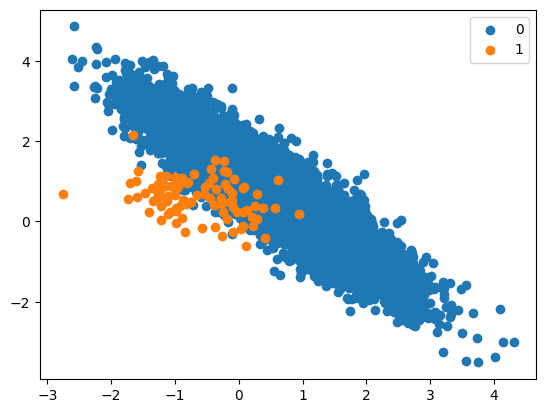

In [4]:
# plot imbalanced classification problem
from matplotlib import pyplot
from numpy import where

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Your Task
For this lesson:

- You must simply run the example and review the plot.

- For bonus points, you can test different class ratios (`weights` parameter) and review the results.

- Write some comments regarding how the data looks like.


In the next lesson, you will discover how to evaluate models for imbalanced classification.

##Lesson 03: Evaluate Imbalanced Classification Models
In this lesson, you will discover how to evaluate models on imbalanced classification problems.

*Prediction accuracy* is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks.

The reason for this is because if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice has no skill.

Instead, alternate performance metrics must be adopted.

Popular alternatives are the *precision* and *recall* scores that allow the performance of the model to be considered by focusing on the minority class, called the positive class.

- **Precision** calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives:

  - $Precision = \frac{TruePositives}{TruePositives + FalsePositives}$

- **Recall** predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives:

  - $Recall = \frac{TruePositives}{TruePositives + FalseNegatives}$

- **F-Measure** summarizes the performance of a model into a single score that averages both the precision and the recall. Maximizing the F-Measure will maximize both the precision and recall at the same time:

  - $F-measure = \frac{(2 \cdot Precision \cdot Recall)}{Precision + Recall}$

The example below fits a *logistic regression model* on an imbalanced classification problem and calculates the accuracy, which can then be compared to the precision, recall, and F-measure.

In [5]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.994
Precision: 1.000
Recall: 0.400
F-measure: 0.571


###Your Task
For this lesson:

- You must run the example and compare the classification accuracy to the other metrics, such as precision, recall, and F-measure.

- For bonus points, try other metrics such as Fbeta-measure, average precision, and ROC AUC scores.

- Write some comments regarding the interpreation of the different metrics



In the next lesson, you will discover how to undersample the majority class.

##Lesson 04: Undersampling the Majority Class
In this lesson, you will discover how to undersample the majority class in the training dataset.

A simple approach to using standard machine learning algorithms on an imbalanced dataset is to change the training dataset to have a more balanced class distribution.

This can be achieved by deleting examples from the majority class, referred to as “undersampling.” A possible downside is that examples from the majority class that are helpful during modeling may be deleted.

The `imbalanced-learn` library provides many examples of undersampling algorithms. This library can be installed easily using pip; for example:

In [6]:
#This is included by default in G.Colab
#!pip install imbalanced-learn

A fast and reliable approach is to randomly delete examples from the majority class to reduce the imbalance to a ratio that is less severe or even so that the classes are even.

The example below creates a synthetic imbalanced classification data, then uses `RandomUnderSampler` class to change the class distribution from 1:100 minority to majority classes to the less severe 1:2.

In [7]:
# example of undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler

# recall initial class distribution
print(f"Initial class distribution: {Counter(y)}")
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(trainX, trainy)
# summarize class distribution
counter_under = Counter(y_under)
print(f"Undersampled class distribution: {counter_under}")

Initial class distribution: Counter({0: 9900, 1: 100})
Undersampled class distribution: Counter({0: 100, 1: 50})


### Your Task
For this lesson, you must:

- run the previous example and note the change in the class distribution before and after undersampling the majority class.

- Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

- For bonus points, try other undersampling ratios or even try other undersampling techniques provided by the `imbalanced-learn` library, and repeat the process.


In the next lesson, you will discover how to oversample the minority class.

In [8]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver='liblinear')
# fit model
model.fit(X_under, y_under)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.954
Precision: 0.153
Recall: 0.800
F-measure: 0.256


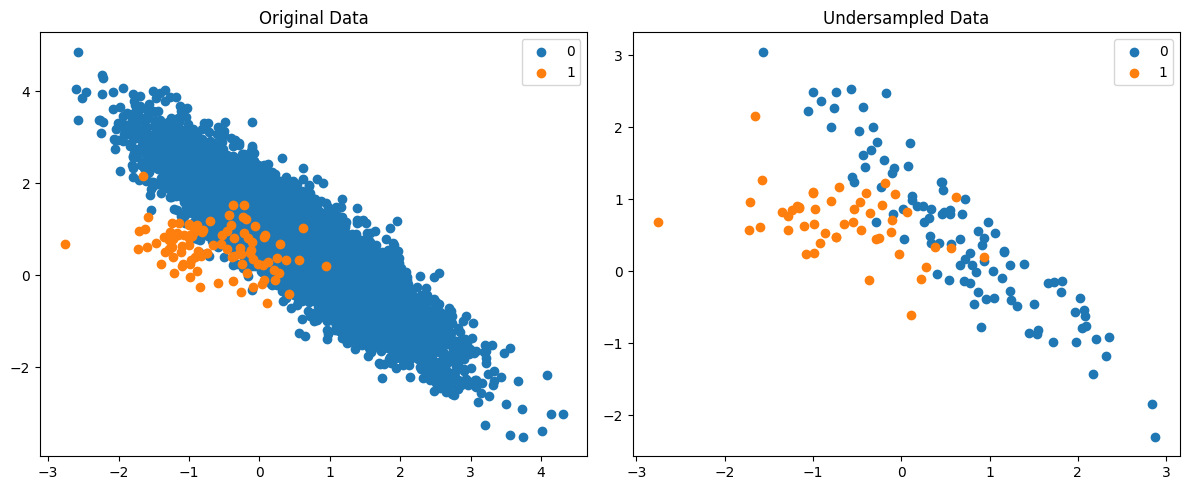

In [9]:
fig, axes = pyplot.subplots(1, 2, figsize=(12, 5))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    axes[0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
axes[0].legend()
axes[0].set_title('Original Data')

for label, _ in counter_under.items():
    row_ix = where(y_under == label)[0]
    axes[1].scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label))
axes[1].legend()
axes[1].set_title('Undersampled Data')

pyplot.tight_layout()
pyplot.show()


##Lesson 05: Oversampling the Minority Class
In this lesson, you will discover how to oversample the minority class in the training dataset.

An alternative to deleting examples from the majority class is to add new examples from the minority class.

This can be achieved by simply duplicating examples in the minority class, but these examples do not add any new information. Instead, new examples from the minority can be synthesized using existing examples in the training dataset. These new examples will be “close” to existing examples in the feature space, but different in small but random ways.

The SMOTE algorithm is a popular approach for oversampling the minority class. This technique can be used to reduce the imbalance or to make the class distribution even.

The example below demonstrates using the SMOTE class provided by the imbalanced-learn library on a synthetic dataset. The initial class distribution is 1:100 and the minority class is oversampled to a 1:2 distribution.



In [10]:
# example of oversampling the minority class
from imblearn.over_sampling import SMOTE

# recall initial class distribution
print(f"Initial class distribution: {Counter(y)}")
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(trainX, trainy)
# summarize class distribution
counter_over = Counter(y_over)
print(f"Oversampled class distribution: {counter_over}")

Initial class distribution: Counter({0: 9900, 1: 100})
Oversampled class distribution: Counter({0: 4950, 1: 2475})


###Your Task
For this lesson, you must:

- Run the previous example and note the change in the class distribution before and after oversampling the minority class.

- Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

- For bonus points, try other oversampling ratios, or even try other oversampling techniques provided by the `imbalanced-learn` library.



In the next lesson, you will discover how to combine undersampling and oversampling techniques.

In [11]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver='liblinear')
# fit model
model.fit(X_over, y_over)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.945
Precision: 0.136
Recall: 0.840
F-measure: 0.234


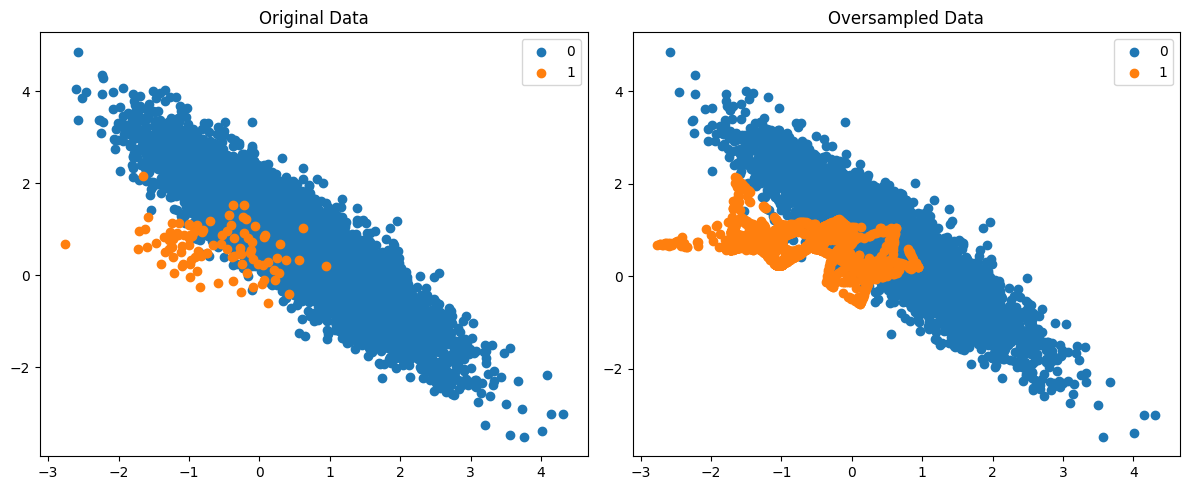

In [12]:
fig, axes = pyplot.subplots(1, 2, figsize=(12, 5))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    axes[0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
axes[0].legend()
axes[0].set_title('Original Data')

for label, _ in counter_over.items():
    row_ix = where(y_over == label)[0]
    axes[1].scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
axes[1].legend()
axes[1].set_title('Oversampled Data')

pyplot.tight_layout()
pyplot.show()


## Lesson 06: Combine Data Undersampling and Oversampling
In this lesson, you will discover how to combine data undersampling and oversampling on a training dataset.

Data undersampling will delete examples from the majority class, whereas data oversampling will add examples to the minority class. These two approaches can be combined and used on a single training dataset.

Given that there are so many different data sampling techniques to choose from, it can be confusing as to which methods to combine. Thankfully, there are common combinations that have been shown to work well in practice; some examples include:

- Random Undersampling with SMOTE oversampling.
- Tomek Links Undersampling with SMOTE oversampling.
- Edited Nearest Neighbors Undersampling with SMOTE oversampling.

These combinations can be applied manually to a given training dataset by first applying one sampling algorithm, then another. Thankfully, the `imbalanced-learn` library provides implementations of common combined data sampling techniques.

The example below demonstrates how to use the SMOTEENN that combines both SMOTE oversampling of the minority class and Edited Nearest Neighbors undersampling of the majority class.



In [18]:
# example of both undersampling and oversampling
from imblearn.combine import SMOTEENN

# recall initial class distribution
print(f"Initial class distribution: {Counter(y)}")
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_hybrid, y_hybrid = sample.fit_resample(trainX, trainy)
# summarize class distribution
counter_hybrid = Counter(y_hybrid)
print(f"Hybrid-sampled class distribution: {counter_hybrid}")

Initial class distribution: Counter({0: 9900, 1: 100})
Hybrid-sampled class distribution: Counter({0: 4463, 1: 2072})


In [14]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver='liblinear')
# fit model
model.fit(X_hybrid, y_hybrid)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.947
Precision: 0.140
Recall: 0.840
F-measure: 0.239


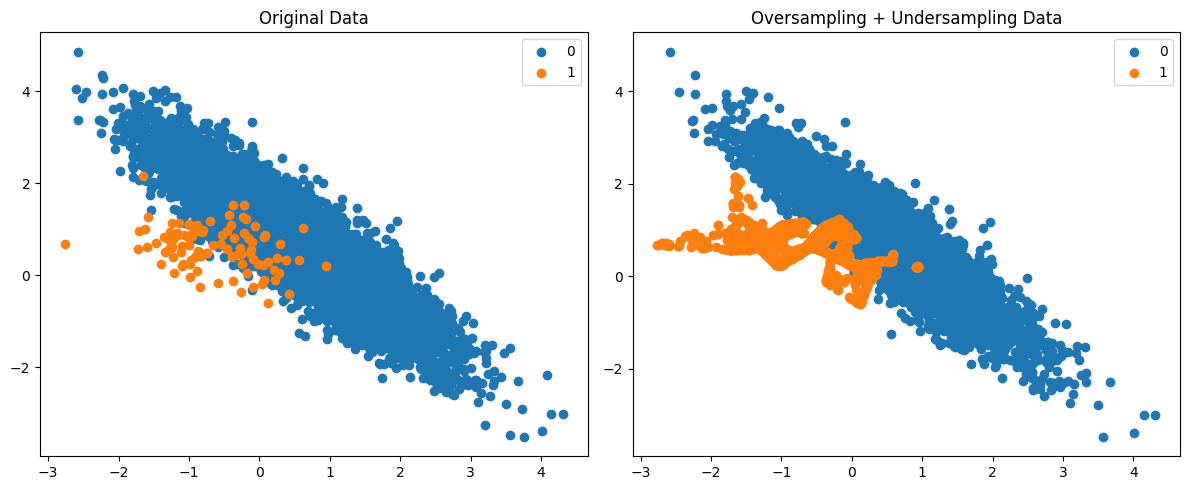

In [15]:
fig, axes = pyplot.subplots(1, 2, figsize=(12, 5))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    axes[0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
axes[0].legend()
axes[0].set_title('Original Data')

for label, _ in counter_hybrid.items():
    row_ix = where(y_hybrid == label)[0]
    axes[1].scatter(X_hybrid[row_ix, 0], X_hybrid[row_ix, 1], label=str(label))
axes[1].legend()
axes[1].set_title('Oversampling + Undersampling Data')

pyplot.tight_layout()
pyplot.show()


### Your Task
For this lesson, you must:

- Run the example and note the change in the class distribution before and after the data sampling.

- Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

- For bonus points, try other combined data sampling techniques or even try manually applying oversampling followed by undersampling on the dataset. For this purpose, you may take advantage of the `Pipeline` tool.



In the next lesson, you will discover how to use cost-sensitive algorithms for imbalanced classification.

## Lesson 07: Cost-Sensitive Algorithms
In this lesson, you will discover how to use cost-sensitive algorithms for imbalanced classification.

Most machine learning algorithms assume that all misclassification errors made by a model are equal. This is often not the case for imbalanced classification problems, where missing a positive or minority class case is worse than incorrectly classifying an example from the negative or majority class.

Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. Many machine learning algorithms can be updated to be cost-sensitive, where the model is penalized for misclassification errors from one class more than the other, such as the minority class.

The scikit-learn library provides this capability for a range of algorithms via the `class_weight` attribute specified when defining the model. A weighting can be specified that is inversely proportional to the class distribution.

If the class distribution was 0.99 to 0.01 for the majority and minority classes, then the `class_weight` argument could be defined as a dictionary that defines a penalty of 0.01 for errors made for the majority class and a penalty of 0.99 for errors made with the minority class, e.g. {0:0.01, 1:0.99}.

This is a useful heuristic and can be configured automatically by setting the `class_weight` argument to the string `‘balanced‘`.

The example below demonstrates how to define and fit a cost-sensitive logistic regression model on an imbalanced classification dataset.

In [19]:
# example of cost sensitive logistic regression for imbalanced classification

# define CS model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.900
Precision: 0.080
Recall: 0.860
F-measure: 0.147


### Your Task
For this lesson, you must:

- Run the example and review the performance of the cost-sensitive model.

- For bonus points, compare the performance to the cost-insensitive version of logistic regression.


This was the final lesson of the mini-course.

## The End?
### (Look How Far You Have Come)
You made it. Well done!

Take a moment and look back at how far you have come.

You discovered:

- The challenge of imbalanced classification is the lack of examples for the minority class and the difference in importance of classification errors across the classes.
- How to develop a spatial intuition for imbalanced classification datasets that might inform data preparation and algorithm selection.
- The failure of classification accuracy and how alternate metrics like precision, recall, and the F-measure can better summarize model performance on imbalanced datasets.
- How to delete examples from the majority class in the training dataset, referred to as data undersampling.
- How to synthesize new examples in the minority class in the training dataset, referred to as data oversampling.
- How to combine data oversampling and undersampling techniques on the training dataset, and common combinations that result in good performance.
-How to use cost-sensitive modified versions of machine learning algorithms to improve performance on imbalanced classification datasets.


### In ML there are no "free lunches".

We have explored how some resampling strategies can enhance the classification performance. However, we need to bear in mind the following:

*  It is not guaranteed that oversampling algorithms such as SMOTE (or related) perform well in all scenarios. How well they work will depend on specific issues, the data complexity and characteristics.
* Default settings in Python modules might not always be effective. Similar to any other machine mearnign methodology, SMOTE also has its own hyperparameters. These hyperparameters need to be optimized. Choosing appropriate hyperparameters is essential for the success of these approaches.
* In this example, we considered a simple stratified holdout validation stategy. For more realiable estimates, we should consider Stratified Cross Validation, to get average performance and associated uncertainty.
* New resampling methods are being proposed everyday. The key trick to choose the best one is to "match" its properties with the characteristics of the data.


## Activity to be carried out

Now it is your turn to check whether you have understood the nature of the imbalanced classification topic, and that you are able to address this issue properly. In order to do so, several activities are asked to test your skills. In particular, you must be able to:

1. Start from a proper imbalanced dataset. You can choose any problem available, but I suggest starting from ["Credit fraud classification" (w. PCA transformed variables)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
2. Select any given baseline classifier.
3. Choose one or several performance metrics for guiding your analysis.
4. Do a thorough comparison of the results by using raw data and the solutions for imbalanced classification. Try using cross-validation for statistical support.
5. Write down a proper discussion on the behaviour shown by the different approaches applied. Use tables / graphs for a better reporting.

**Tips**:

- Always remember to start with the baseline performance (no special method applied).
- Then, you must select among the undersampling approaches, which one seems to be more appropriate.
- Repeat the process with oversampling, and with hybrid approaches.
- You may also consider ensemble learning solutions.
- For cost-sensitive, you may also try "thresholding", by using the output probabilities and provide the *positive* or *negative* label using this: `y_pred = estimator.predict_proba(X_test)[:, 1] > .85`
- You can use statistical tests for contrasting the different approaches, in order to have well-founded conclusions.
- As a suggestion, use average precision-recall as default metric to ease the complete procedure, but you may also check out how the recognition of both classes change for each approach applied.
- You can also use as default imbalance ratio for preprocessing 1:1 or 1:2, or rather to check different values for the sampling ratio to observe whether there are significant differences among the results.

In [17]:
#Here you may add your source code to solve the proposed task
#Remember to divide en different code snippets for organizational purposes

## References

Some advanced topics are covered in these links:

- [Class Imbalance: Random Sampling and Data Augmentation with Imbalanced-Learn](https://towardsdatascience.com/class-imbalance-random-sampling-and-data-augmentation-with-imbalanced-learn-63f3a92ef04a)
- [SMOTE: Synthetic Data Augmentation for Tabular Data](https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc)
- [Methods for dealing with imbalanced data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)
- [Credit card fraud dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- [Threshold moving for imbalanced classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)
- [Tour of evaluation metrics for imbalanced classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
- [Tactics to combat imbalanced classes in Machine Learning](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)